## This script includes the following points:
1. Importing libraries
2. Data Preparation
3. Decision Tree
4. Confusion Matrices
6. Try again with scaled Data
7. ChatGPT Version

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [2]:
#Create a path to where your data is stored.
path = r"C:\Users\Poory\OneDrive\Desktop\project\ClimateWins"

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#Read in the European weather data and Answers Data set.

climate = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
answers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [5]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84

In [6]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Data Preparation:

In [7]:
#dropping unrelated station data from main dataset
df = climate.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max']).copy()

In [8]:
#Create an 'X' and y df by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'],axis=1)

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [11]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

### 3. Decision Tree

[Text(0.3673898759744509, 0.9807692307692307, 'x[49] <= 17.95\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06319631359722508, 0.9423076923076923, 'x[98] <= 17.95\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.018053696457990116, 0.9038461538461539, 'x[19] <= 17.95\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.007928979612850082, 0.8653846153846154, 'x[78] <= 17.85\ngini = 0.00

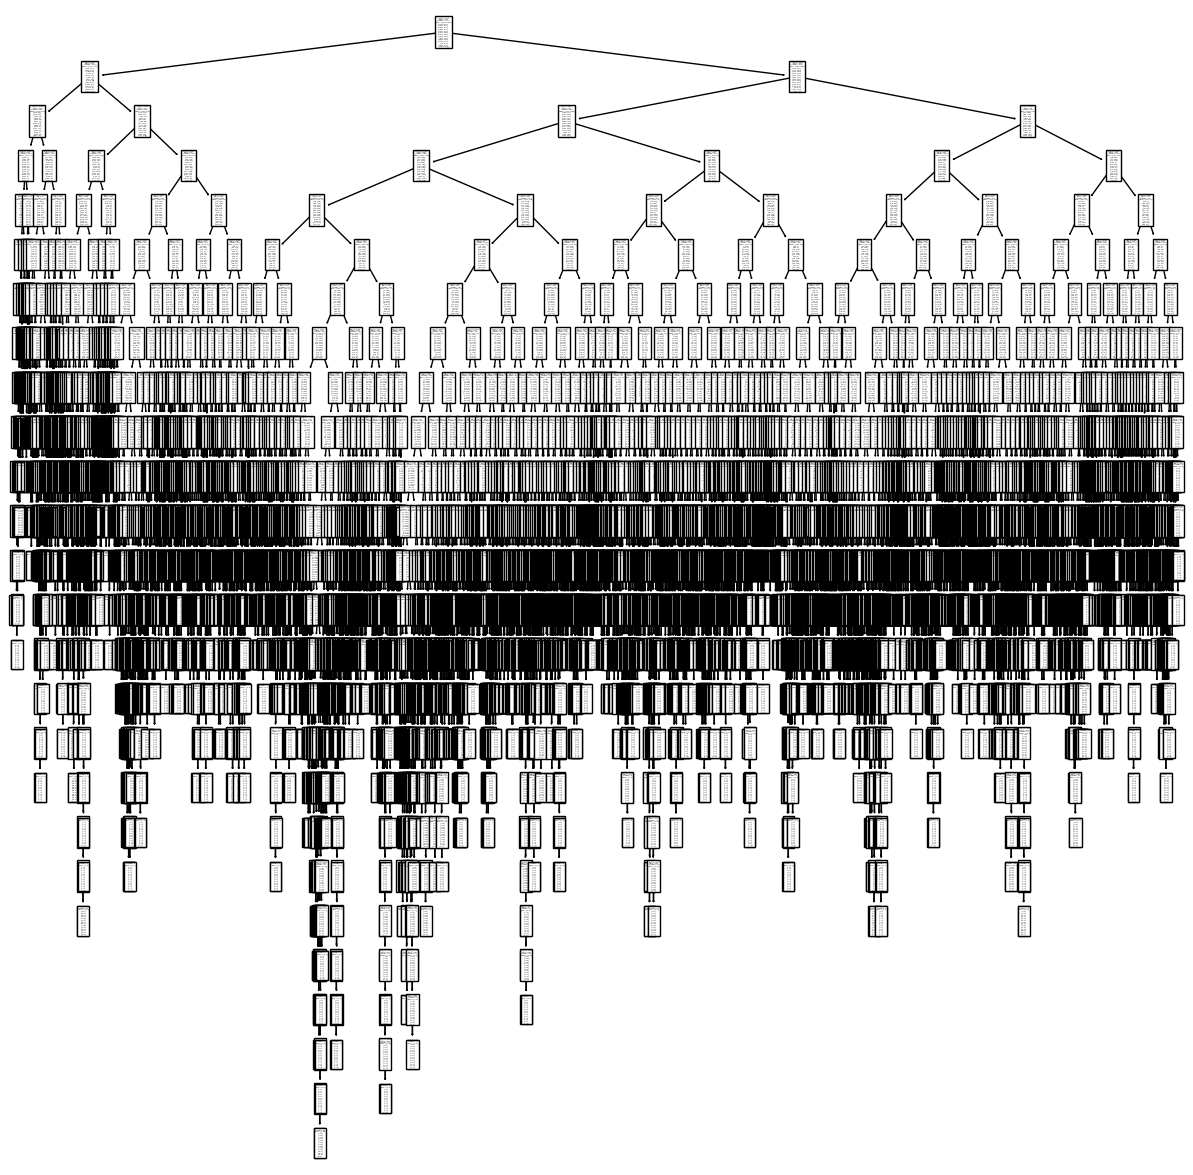

In [13]:
#Run Decision Tree classifier
df_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
df_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(df_dt)

In [14]:
#What is the training accuracy score? Using the cross-validation method
y_pred_train = df_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(df_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6023703420358705


In [19]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)


['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


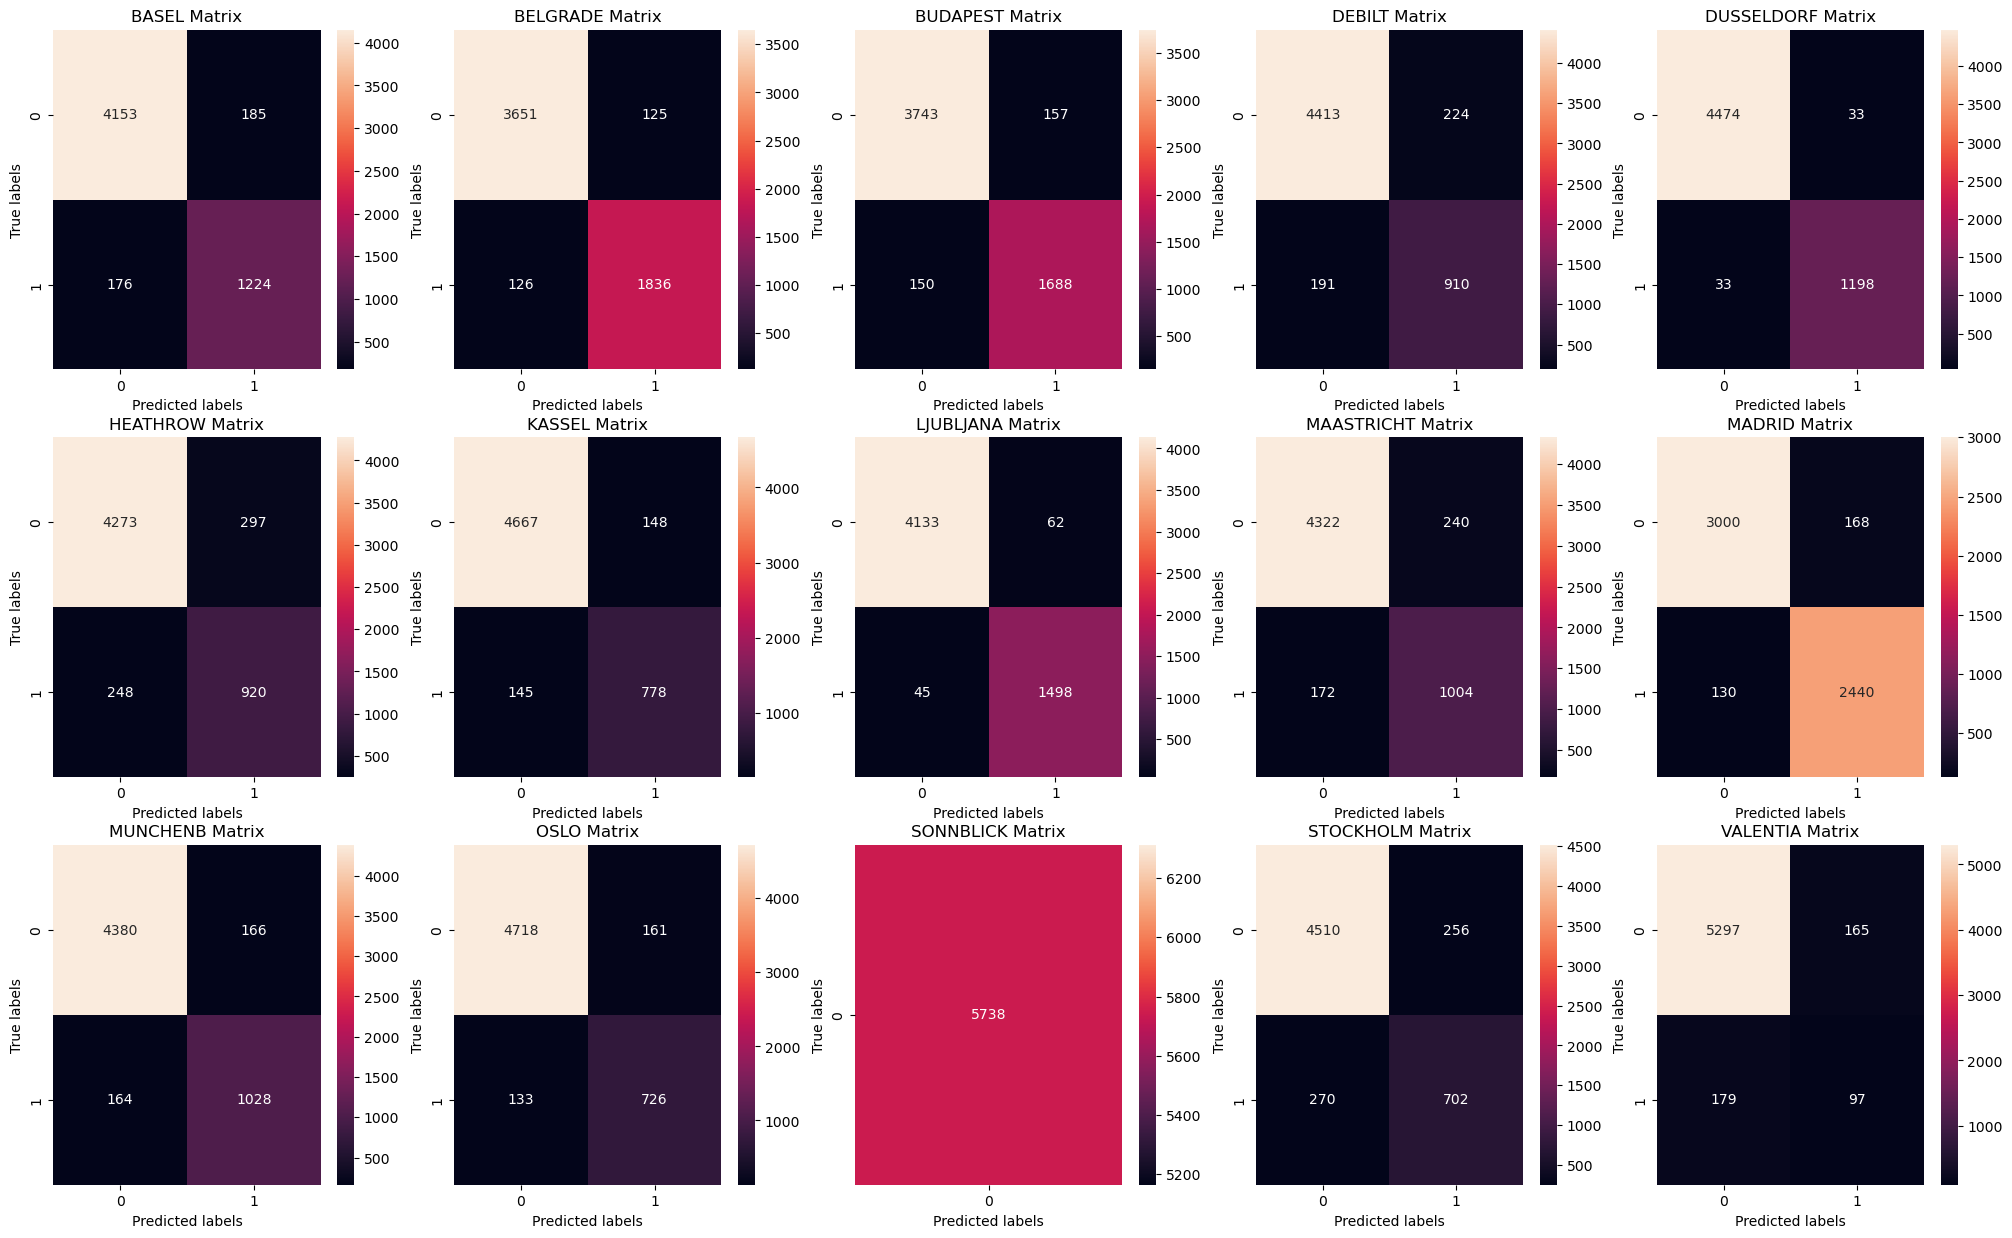

In [22]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], df_dt.predict(X_test)[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### **Train Accuracy and Overfitting:**
#### The train accuracy score using cross-validation is 0.60. This score shows that our model is only about 60% accurate when evaluated on the training data using cross-validation. Given this relatively low accuracy, it seems like the Decision Tree may be underfitting the data, meaning that it isn't complex enough to capture all the important patterns in the dataset.

### **Model Performance:** 
#### The Decision Tree is making a reasonable number of correct predictions (as shown by the True Positives and True Negatives) but also a significant number of mistakes (False Positives and False Negatives).

### **Bias vs. Variance:**
#### With a training accuracy of 0.60, our model is likely biased, meaning it struggles to learn enough from the data. This could be due to using a decision tree that isn't deep enough (or possibly too deep and overfitting certain areas). Pruning the tree or tuning hyperparameters (like max_depth) may help.

### **Weather Stations:** 
#### Some stations, like SONNBLICK, show strange results where there are no pleasant weather days predicted. This may indicate some issue with the data for that station or how the model is treating it. For other stations, like BASEL, there is a good balance between predictions but still a number of misclassifications.

### 4. Scaling Data

In [23]:
#create a scaler object using StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#create new df with scaled data

df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = df.columns

df_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-0.008724,-1.203514,-0.406430,-1.149211,-1.370824,-1.125110,-1.578385,0.703568,2.336053,0.267752,-1.043873,-1.052433,0.252496,-0.810834,-0.097084,0.382899,-0.387967,0.855172,-1.419038,1.887115,1.149046,-1.423735,-0.315682,-1.521762,-0.988280,-0.877723,-1.044732,-0.093824,-0.746542,-1.244144,-0.282933,-0.30647,-1.098059,-0.265742,-0.505735,-0.350849,1.111743,0.816809,1.544023,-1.142400,-1.067870,1.925426,-0

In [24]:
#Create an 'X' and y df by dropping the unneeded columns.
X = df_scaled.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'],axis=1)

In [25]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [27]:
#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

[Text(0.3683370094182678, 0.9807692307692307, 'x[49] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06366238658284956, 0.9423076923076923, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.018230673084869017, 0.9038461538461539, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.008037171514750847, 0.8653846153846154, 'x[78] <= 0.233\ngini = 0.0

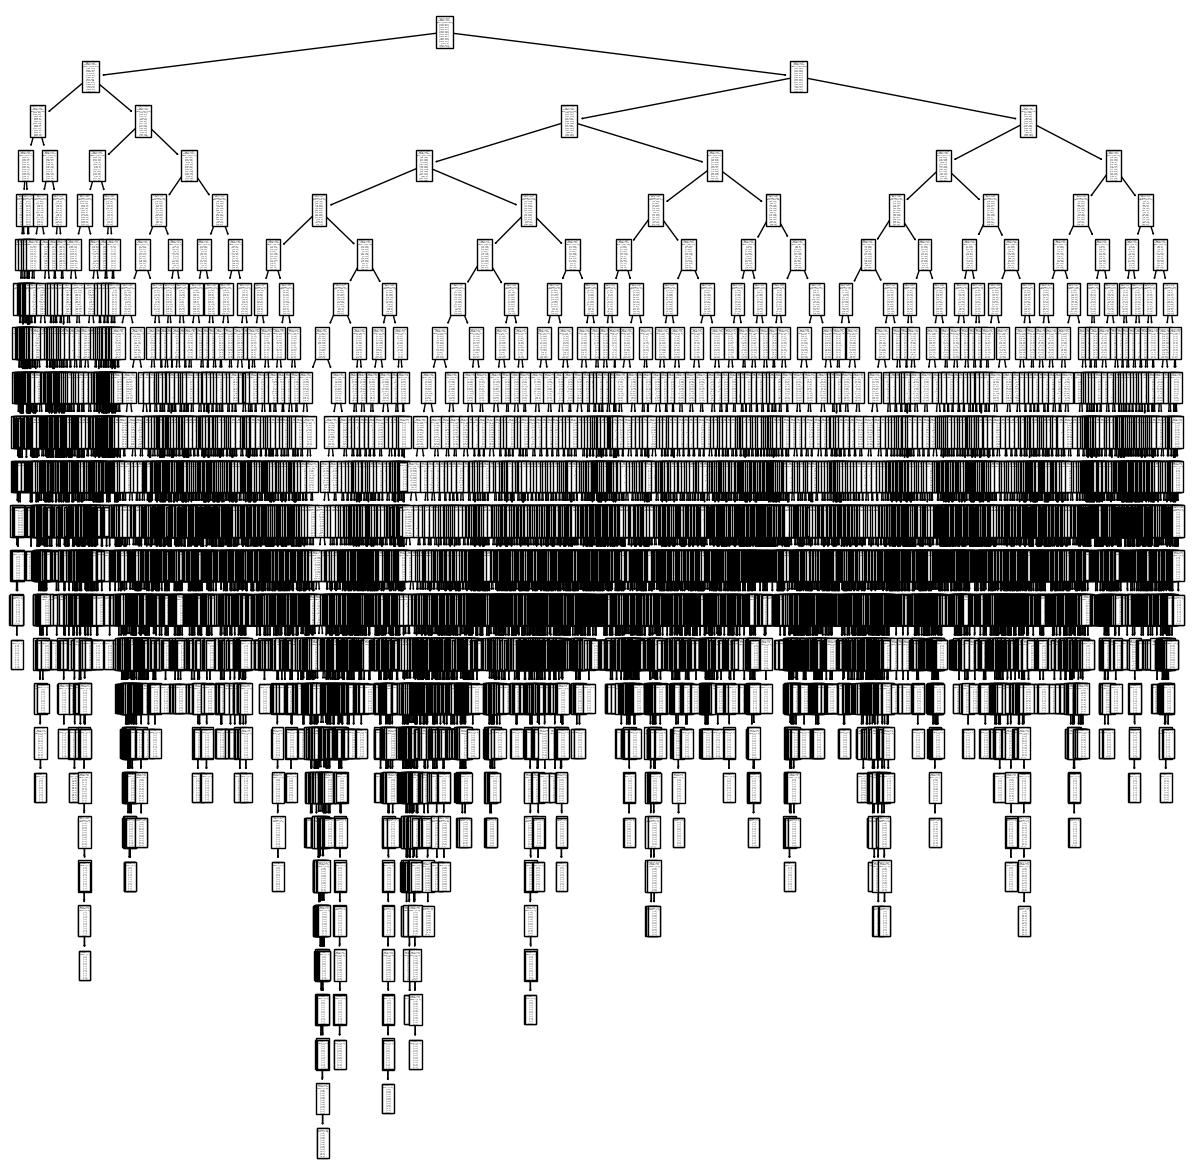

In [30]:
#Run Decision Tree classifier
df_dt2 = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
df_dt2.fit(X_train, y_train)
plt.figure(figsize=(15,15))
tree.plot_tree(df_dt2)

In [31]:
#What is the training accuracy score? Using the cross-validation method
y_pred_train = df_dt2.predict(X_train)
print('Train accuracy score: ',cross_val_score(df_dt2, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.600511309012922


['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


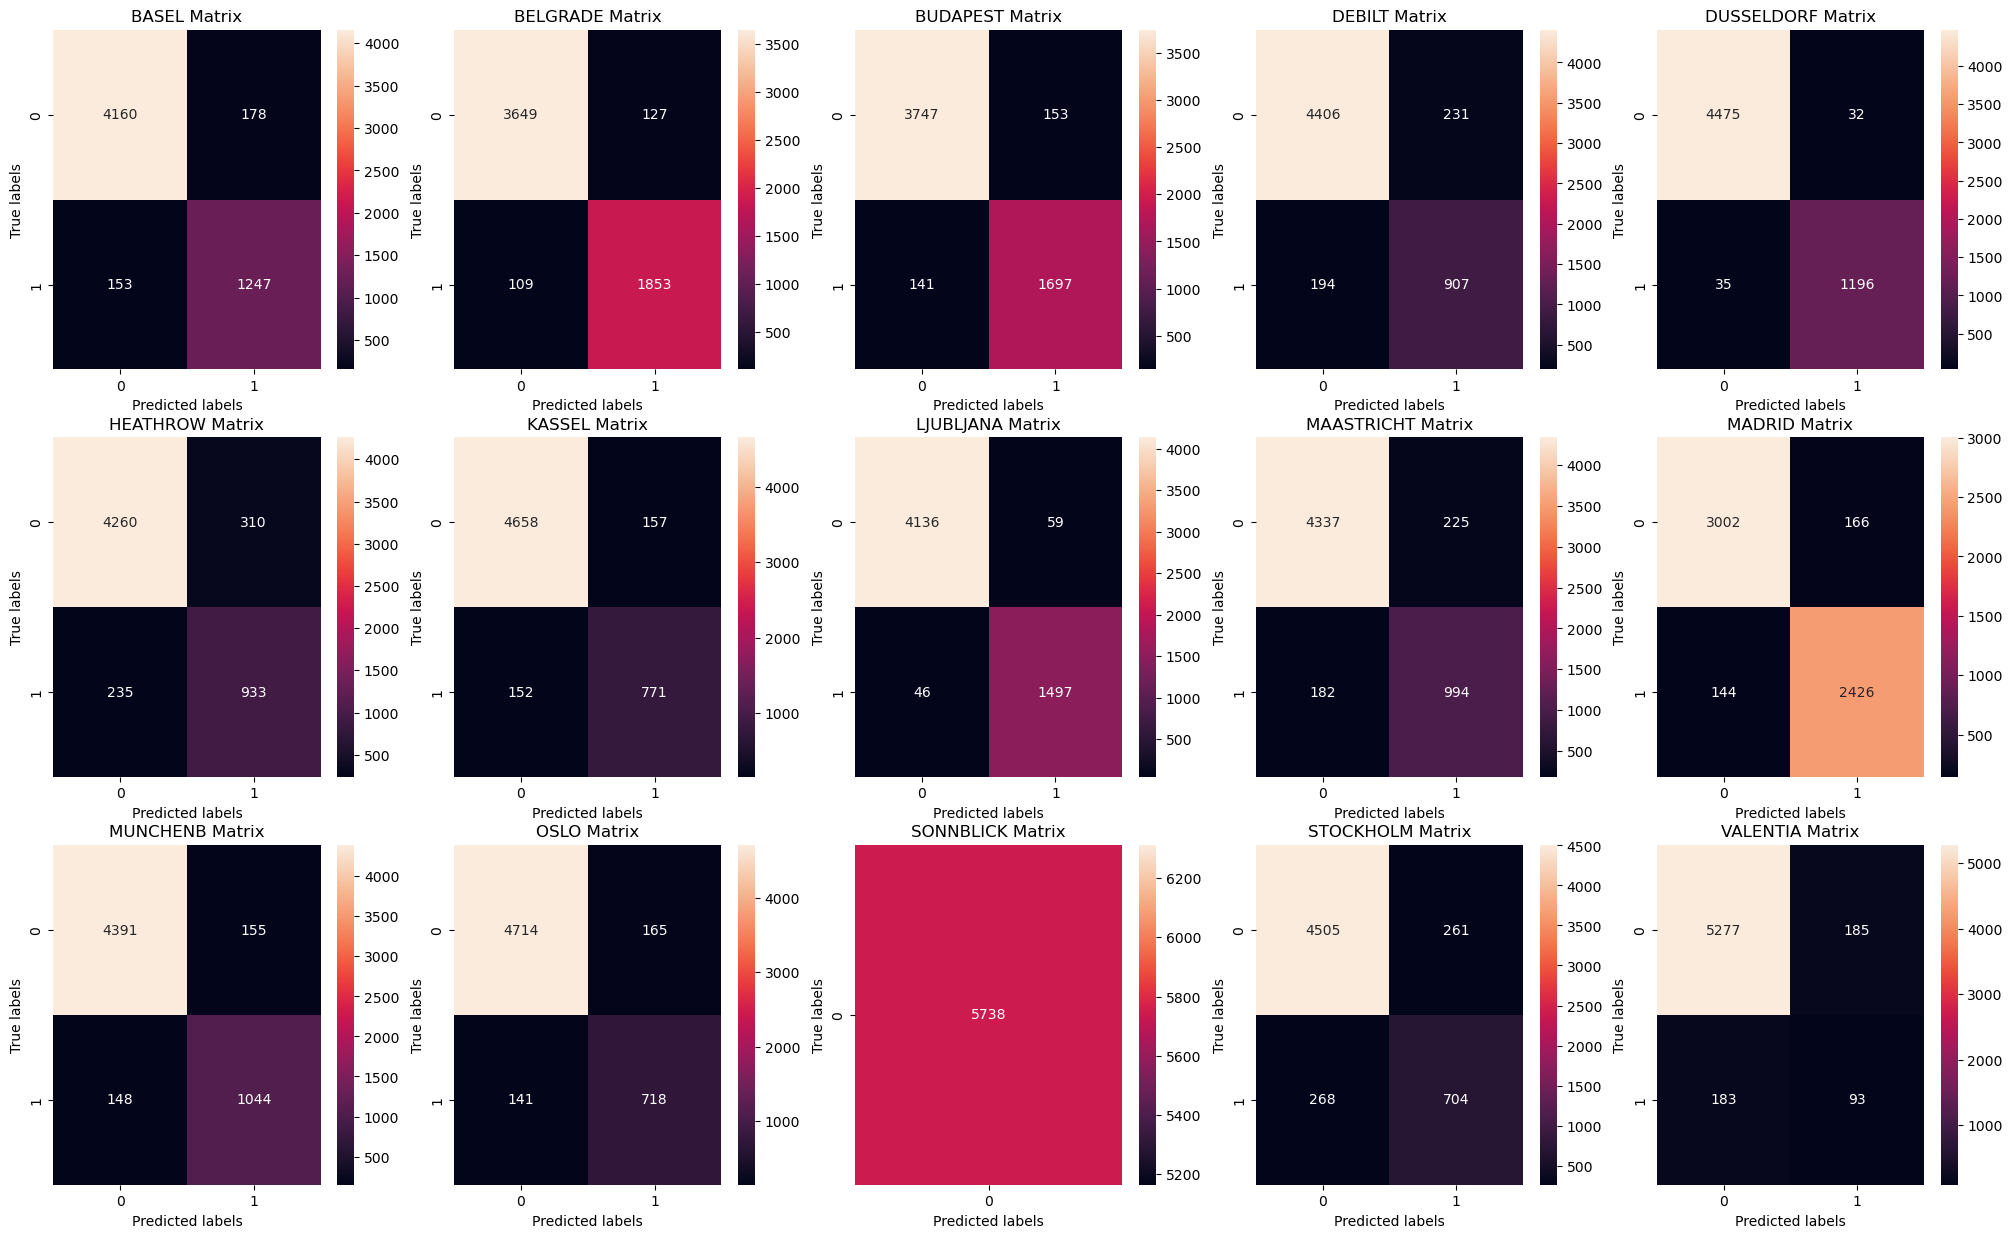

In [32]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], df_dt2.predict(X_test)[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1


### The fact that scaling the data only led to a very small difference in the training accuracy (from 0.602 to 0.600) suggests that scaling did not significantly affect the model's performance. 

### This can happen with Decision Tree algorithms because they are not sensitive to the scale of the data, unlike algorithms such as KNN or Artificial Neural Networks. Decision trees make decisions by splitting data based on feature thresholds, and those splits do not depend on the scale of the input variables.

##### (OpenAI. (2024). ChatGPT (4o) [Large language model]. https://chatgpt.com/c/a42b6d18-06fa-40a8-9873-bb59f6afa0cf)

### 5, ChatGPT Version

In [33]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target labels)
X = df_scaled.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'],axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


#### Decision Tree Model:

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize and train the decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Check accuracy
train_accuracy_dt = dt_model.score(X_train, y_train)
test_accuracy_dt = dt_model.score(X_test, y_test)

print(f'Decision Tree Train Accuracy: {train_accuracy_dt}')
print(f'Decision Tree Test Accuracy: {test_accuracy_dt}')


Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.6333217148832345


#### Evaluate the Decision Tree:

In [35]:
# Prune the tree by limiting its depth
dt_model_pruned = DecisionTreeClassifier(max_depth=10)
dt_model_pruned.fit(X_train, y_train)

# Check accuracy
train_accuracy_dt_pruned = dt_model_pruned.score(X_train, y_train)
test_accuracy_dt_pruned = dt_model_pruned.score(X_test, y_test)


#### Confusion Matrix for Decision Tree:

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


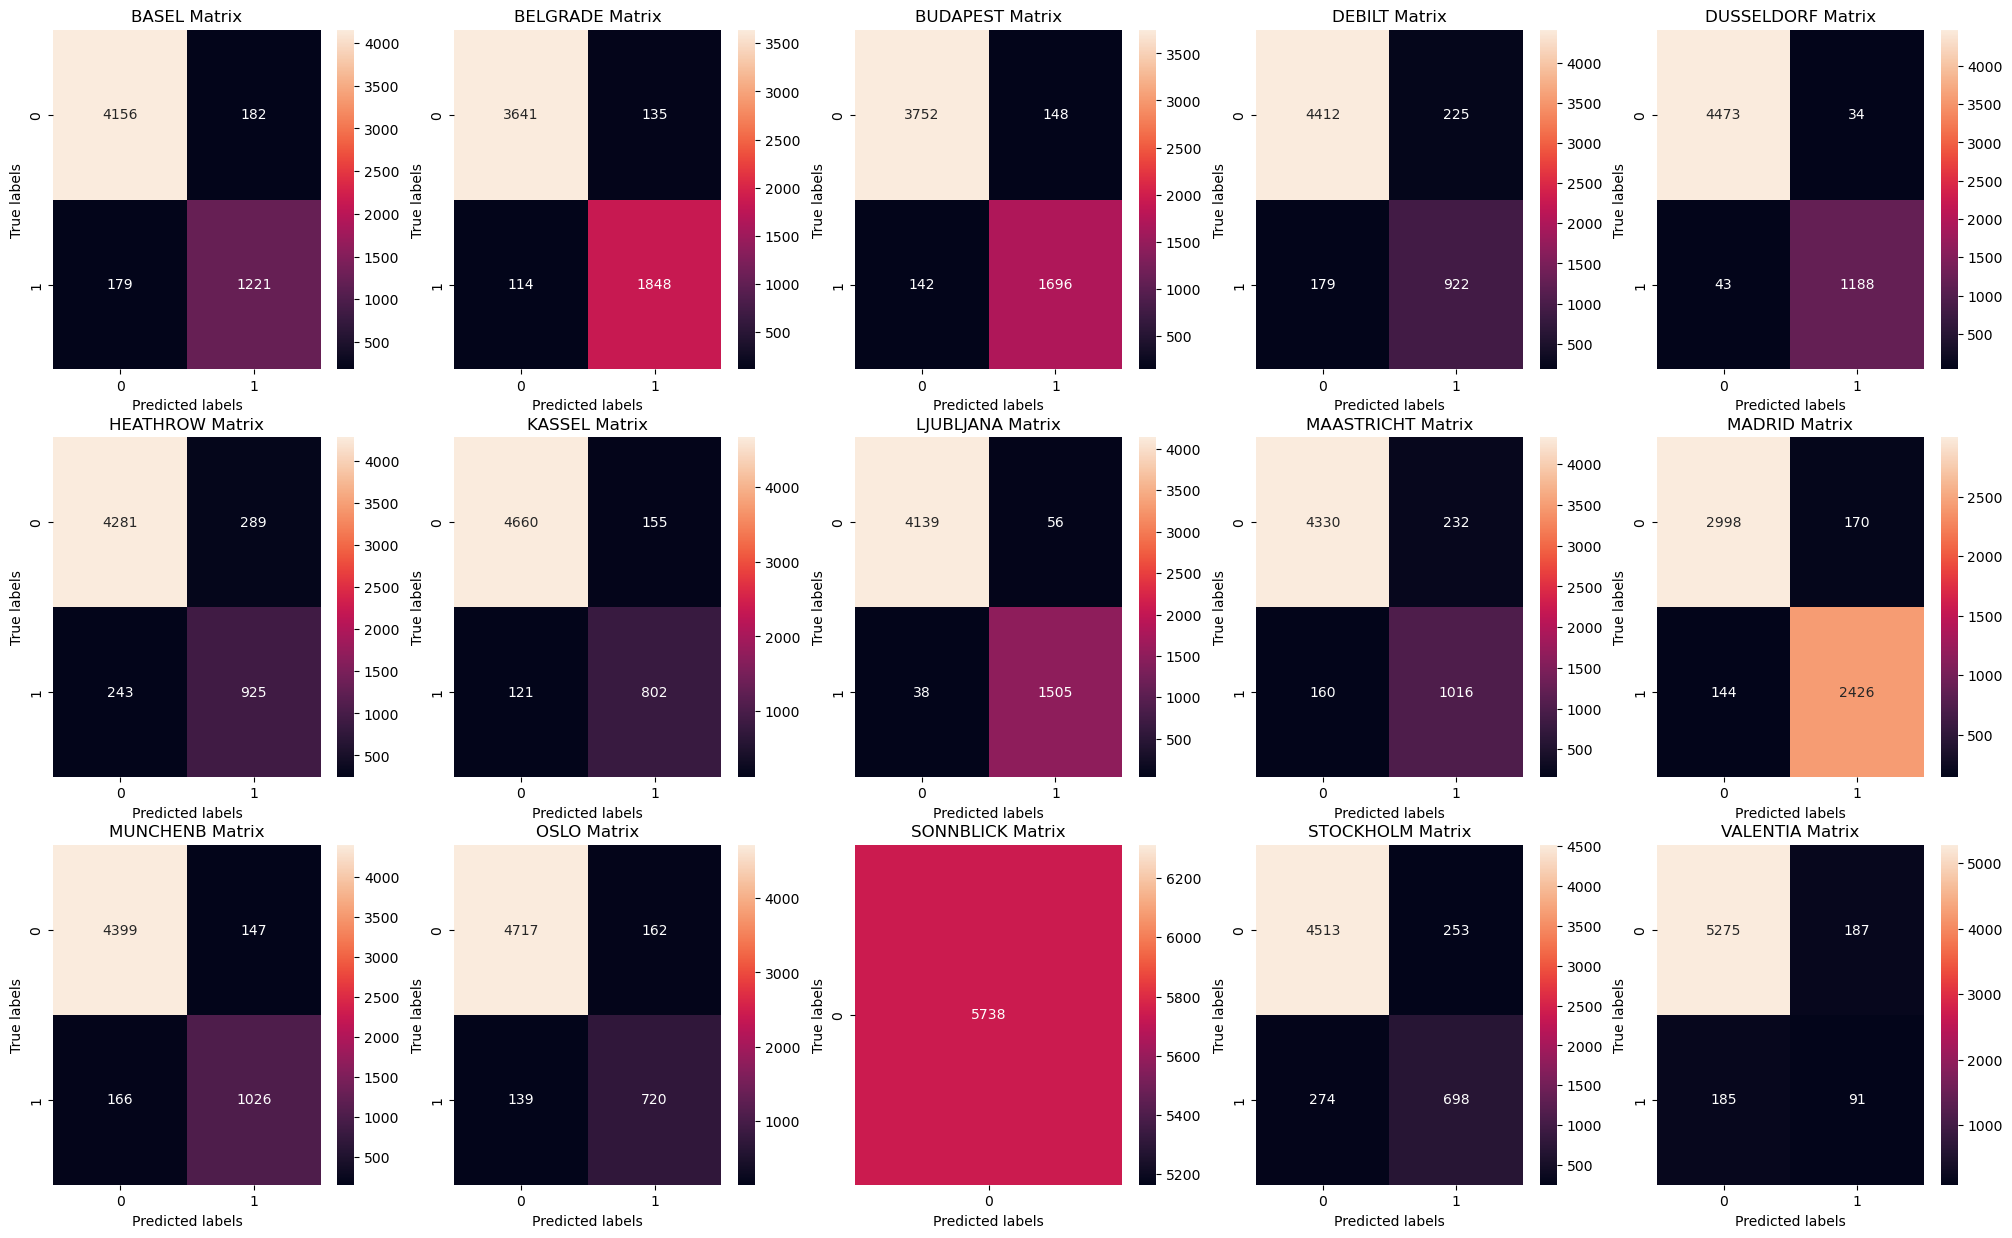

In [37]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], dt_model.predict(X_test)[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1